# Data Analysis of Citibike, NYC's bike sharing program

### By Haripriya Iyer, Kishore Ravisankar, Priya Anand and Priya Karadi

We are analyzing the trip data of the bike sharing program of NYC, popularly known as Citibike, for the year 2017. 

Aim: To help improve the operations of Citi Bike and show commuters the benefits of using bike-sharing.

SQL Analysis:
1. We have 16 million trip records in the table tripdata for the year 2017.
2. There is no identifier to uniquely identify a trip. Also, no identifier for individual user.

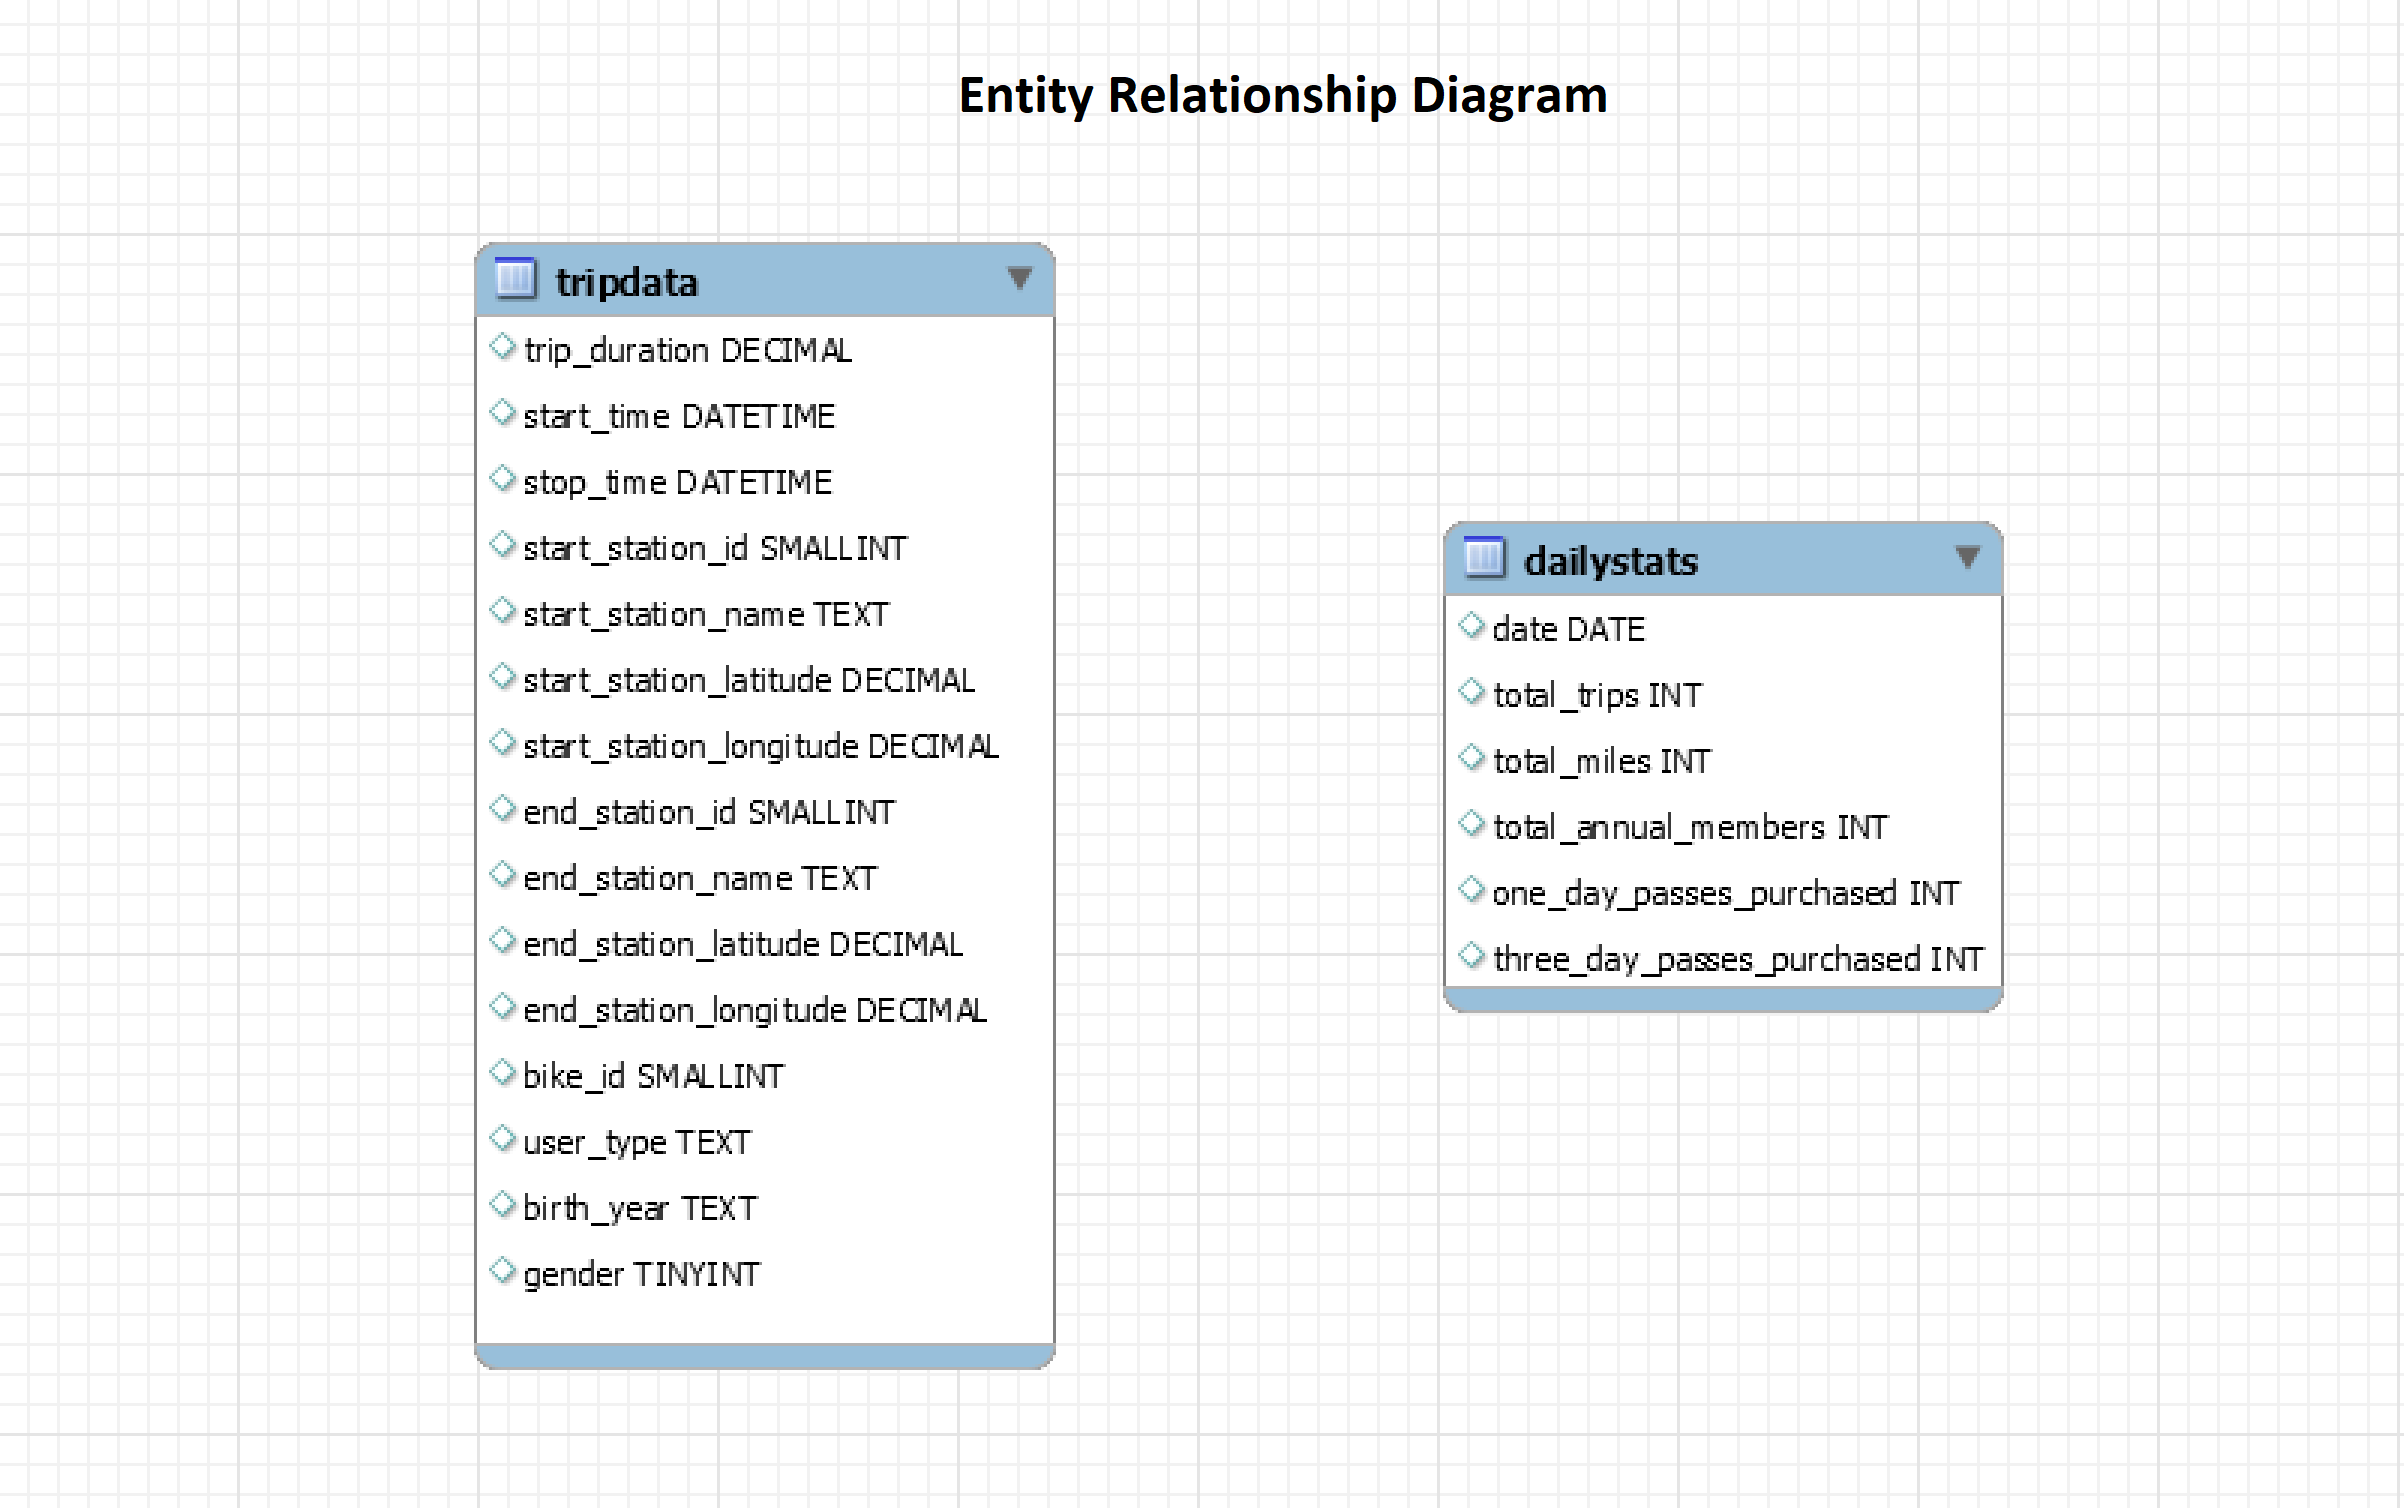

In [11]:
from IPython.display import Image
PATH = "C:\\Users\\pshar\\Desktop\\Citibike\\"
Image(filename = PATH + "schema.png",width=700,height=1200)

In [343]:
from IPython.display import HTML
HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show}
$( document ).ready(code_toggle);
</script>The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [5]:
import pymysql.cursors
import gmaps
import gmaps.datasets
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import colorlover as cl
from IPython.core.display import display,HTML
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import settings
gmaps.configure(api_key=settings.GMAPS_API_KEY)
import warnings
warnings.filterwarnings('ignore')

In [7]:
db = pymysql.connect(host="127.0.0.1",    # your host, usually localhost
                     user="root",         # your username
                     passwd="root",       # your password
                     db="citibike")    # name of the data base

In [8]:
querystr = 'select count(*) from tripdata'
cur = db.cursor()
cur.execute(querystr)
total_count=0
print('Total number of trips taken in the year 2017:')
for row in cur.fetchall():
    total_count=row[0]
print(total_count)

Total number of trips taken in the year 2017:
16364657


In [131]:
querystr = 'select count(*) from tripdata where user_type = "Subscriber"'
cur = db.cursor()
cur.execute(querystr)
subscribers=0
for row in cur.fetchall():
    subscribers=row[0]

In [132]:
querystr = 'select count(*) from tripdata where user_type = "Customer"'
cur = db.cursor()
cur.execute(querystr)
customers=0
for row in cur.fetchall():
    customers=row[0]

In [144]:
trace = go.Pie(labels=['Subscribers','Customers'], values=[subscribers,customers],pull=0.1,textfont=dict(size=16),title='User Distribution of Citibike users')

iplot([trace], filename='basic_pie_chart')

In [315]:
querystr = 'select count(*) from tripdata where gender = 1'
cur = db.cursor()
cur.execute(querystr)
males=0
for row in cur.fetchall():
    males=row[0]
    
querystr = 'select count(*) from tripdata where gender = 2'
cur = db.cursor()
cur.execute(querystr)
females=0
for row in cur.fetchall():
    females=row[0]

trace = go.Pie(labels=['Male','Female','Unknown'], values=[males,females,total_count-males-females],pull=0.1,textfont=dict(size=16),title='Gender Distribution of Citibike users')

iplot([trace], filename='basic_pie_chart')

In [216]:
querystr = 'select count(*),t.age  from (select YEAR(CURDATE()) - birth_year AS age,birth_year from tripdata where birth_year<> "" ) t where t.age<80 group by t.age'
cur = db.cursor()
cur.execute(querystr)
user_count=[]
ages=[]
for row in cur.fetchall():
    user_count.append(int(row[0]))
    ages.append(int(row[1]))

In [229]:
data = [go.Bar(x=ages,y=user_count,marker=dict(color='seagreen'))]

layout = go.Layout(
    title = 'Age distribution of users',
    yaxis=dict(title='Number of users'),
    xaxis=dict(title='Age')

)

fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='jupyter-basic_bar')

In [259]:
querystr = 'select count(distinct bike_id),monthname(start_time) from tripdata group by month(start_time)'
cur = db.cursor()
cur.execute(querystr)
bikes=[]
months=[]
for row in cur.fetchall():
    bikes.append(row[0])
    months.append(row[1])

In [236]:
total=sum(bikes)
print(total,'bikes were operational under Citibike for the year 2017.')

124644 bikes were operational under Citibike for the year 2017.


In [237]:
colors=['rgb(166,206,227)','rgb(31,120,180)','rgb(178,223,138)', 'rgb(51,160,44)', 'rgb(251,154,153)',  'rgb(227,26,28)',
  'rgb(253,191,111)',
  'rgb(255,127,0)',
  'rgb(202,178,214)',
  'rgb(106,61,154)',
  'purple','orangered']
data = [go.Bar(x=months,y=bikes,marker=dict(color=colors))]

layout = go.Layout(
    title = 'Number of bikes operational under Citibike',
    yaxis=dict(title='Number of bikes'),
    xaxis=dict(title='Months')

)

fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='jupyter-basic_bar')


In [239]:
querystr = 'select monthname(td.start_time) mnth, count(*) from tripdata td group by mnth'
cur = db.cursor()
cur.execute(querystr)
months=[]
monthly_count=[]
for row in cur.fetchall():
    months.append(row[0])
    monthly_count.append(row[1])

In [240]:
data = [go.Bar(x=months,y=monthly_count,marker=dict(color=colors))]

layout = go.Layout(
    title = 'Number of trips taken per month',
    yaxis=dict(title='Number of trips'),
    xaxis=dict(title='Months')

)

fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='jupyter-basic_bar')

In [352]:
querystr = 'select round(avg(total_trips)), date from dailystats group by month(date);'
querystr1 = 'select total_trips, date from dailystats;'

count = []    
date = []    
cur = db.cursor()
cur.execute(querystr)

for row in cur.fetchall():
    count.append(row[0])
    date.append(row[1])

count1 = []    
date1 = []    
cur.execute(querystr1)

for row in cur.fetchall():
    count1.append(row[0])
    date1.append(row[1])

tr =  go.Bar(x=date,
            y=count,
          marker=dict(
        color='rgb(55, 83, 109)'
        ),
       name = 'Average Monthly Trip Count'
        )
tr1 = go.Scatter(
    x=date1,
    y=count1,
    name = 'Daily Trip Count'
    )   
data = [tr,tr1]

layout = go.Layout(
    title = 'Number of Trips per Month',
    yaxis=dict(title='No. of Trips'),
    xaxis=dict(title='Months')

)

fig = go.Figure(data=data, layout=layout)


iplot(fig, filename='jupyter-basic_bar')



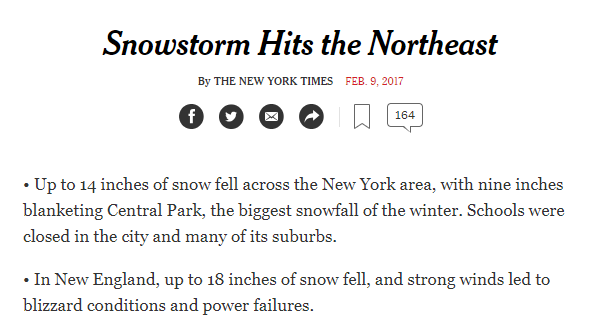

In [342]:
from IPython.display import Image
PATH = "C:\\Users\\pshar\\Desktop\\Citibike\\"
Image(filename = PATH + "feb9th.png")

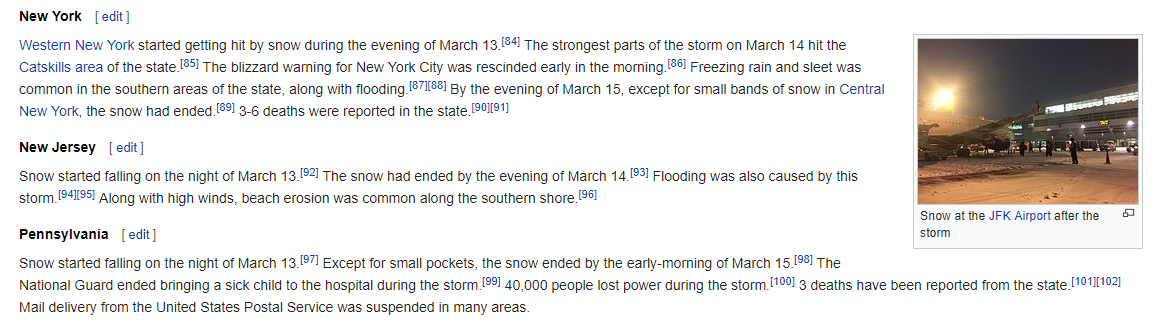

In [341]:
from IPython.display import Image
PATH = "C:\\Users\\pshar\\Desktop\\Citibike\\"
Image(filename = PATH + "blizzardpic.png")

In [344]:
querystr = 'select count(*) from tripdata td where (time(td.stop_time) - time(td.start_time)) < 120'
cur = db.cursor()
cur.execute(querystr)
user_count=[]
ages=[]
two_min_rides=0
print('Number of rides with trip duration less than two minutes:')
for row in cur.fetchall():
    two_min_rides=row[0]
print(two_min_rides)

Number of rides with trip duration less than two minutes:
86638


In [345]:
trace = go.Pie(labels=['<2 minutes','>2 minutes'], values=[two_min_rides,total_count-two_min_rides],pull=0.1,rotation=45,textfont=dict(size=16),title='Ride duration distribution')

iplot([trace], filename='basic_pie_chart')

In [356]:
querystr = 'select avg(total_miles),date from dailystats group by month(date)'

count = []    
date = []   
dailycount = []
dailydate = []

cur1 = db.cursor()
cur1.execute(querystr)

for row in cur1.fetchall():
    count.append(row[0])
    date.append(row[1])


s = []
for i in range(len(count)):
        s.append(count[i]/1500)
        

trace0 = go.Scatter(
    x=date,
    y=count,
    mode='markers',
    marker=dict(
        color=['rgb(93, 164, 214)', 'rgb(255, 144, 14)','rgb(93, 164, 214)','rgb(255, 65, 54)' ,'rgb(93, 164, 214)', 'rgb(255, 144, 14)',
        'rgb(44, 160, 101)', 'rgb(255, 65, 14)','rgb(255, 144, 54)','rgb(44, 160, 14)','rgb(44, 160, 101)', 'rgb(255, 65, 54)'],
        opacity=[0.4, 0.8, 0.6, 0.4, 0.8, 0.8,1, 0.8,0.6, 0.8, 0.6, 0.4],
        size=s
        
    )    
)
layout = go.Layout(
    title = 'Average Distance Covered per Month',
    yaxis=dict(title='Miles'),
    xaxis=dict(title='Months')

)

data = [trace0]

fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='bubblechart-color')

In [290]:
querystr = 'select Count(*) as frequency,hour(start_time) as Start_hour from tripdata group by hour(start_time)'
cur = db.cursor()
cur.execute(querystr)
hourly_count=[]
hour_of_day=[]
for row in cur.fetchall():
    hourly_count.append(row[0])
    hour_of_day.append(row[1])

In [301]:
data = [go.Bar(x=hour_of_day,y=hourly_count,marker=dict(color=colors[::-1]*2))]

layout = go.Layout(
    title = 'Rush hour figures',
    yaxis=dict(title='Number of trips'),
    xaxis=dict(title='Hours of the day')

)

fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='jupyter-basic_bar')

In [247]:
querystr = 'select (monthname(td.start_time)) month_wise_rides, count(*)  from tripdata td where td.user_type = "Subscriber" group by month_wise_rides'
cur = db.cursor()
cur.execute(querystr)
months=[]
monthly_subscriber_count=[]
for row in cur.fetchall():
    months.append(row[0])
    monthly_subscriber_count.append(row[1])

In [355]:
data = [go.Bar(x=months,y=monthly_subscriber_count,marker=dict(color=colors[::-1]))]

layout = go.Layout(
    title = 'Number of trips taken by subscribers in 2017',
    yaxis=dict(title='Number of trips'),
    xaxis=dict(title='Months')

)

fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='jupyter-basic_bar')

In [257]:
querystr = 'select (monthname(td.start_time)) month_wise_rides, count(*)  from tripdata td where td.user_type = "Customer" group by month_wise_rides'
cur = db.cursor()
cur.execute(querystr)
months=[]
monthly_customer_count=[]
for row in cur.fetchall():
    months.append(row[0])
    monthly_customer_count.append(row[1])

In [300]:
data = [go.Bar(x=months,y=monthly_customer_count,marker=dict(color=colors[::-1]))]

layout = go.Layout(
    title = 'Number of trips taken by customers in 2017',
    yaxis=dict(title='Number of trips'),
    xaxis=dict(title='Months')

)

fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='jupyter-basic_bar')

In [348]:
trace = go.Pie(labels=["Subscribers","Customers"], values=[811.3778,2499.9315],textfont=dict(size=16),title='Time utilisation of bike')

iplot([trace], filename='basic_pie_chart')

In [261]:
querystr = 'select total_annual_members, date from dailystats where date = LAST_DAY(date) group by month(date)'
querystr2 = 'select total_annual_members,date from dailystats'

count = []    
date = []   
dailycount = []
dailydate = []

cur1 = db.cursor()
cur1.execute(querystr)

for row in cur1.fetchall():
    count.append(row[0])
    date.append(row[1])

cur = db.cursor()
cur.execute(querystr2)

for row in cur.fetchall():
    dailycount.append(row[0])
    dailydate.append(row[1])

plot1 = go.Scatter(
    x=dailydate,
    y=dailycount,
    name = 'Daily Count'
)

plot2 = go.Bar(x=date,y=count,
               name = 'Monthly Count',
              )    

data = [plot1, plot2]

layout = go.Layout(
    title = 'Annual Membership of Citibike',
    yaxis=dict(title='No. of Members'),
    xaxis=dict(title='Months')

)

fig = go.Figure(data=data, layout=layout)

iplot(fig,filename='bar-line')


In [262]:
querystr1 = 'select one_day_passes_purchased, date from dailystats;'
querystr2 ="select three_day_passes_purchased, date from dailystats;"

count1 = []    
date1 = [] 
count2 = []    
date2 = [] 

cur = db.cursor()
cur.execute(querystr1)
for row in cur.fetchall():

    count1.append(row[0])
    date1.append(row[1])

    
cur.execute(querystr2)
for row in cur.fetchall():

    count2.append(row[0])
    date2.append(row[1])

data1 = go.Bar(x=date1,
            y=count1,
            name = 'One day Passes Purchased'
              )
data2 = go.Bar(x=date2,
            y=count2,
               name = 'Three Day Passes Purchased'
              )

data = [data1,data2]
layout = go.Layout(
    title = 'No. of One Day and Three Day Passes purchased per month',
    yaxis=dict(title='No. of Passes'),
    xaxis=dict(title='Months'),
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)


iplot(fig, filename='grouped-bar')


In [349]:
querystr1 = 'select one_day_passes_purchased, date from dailystats;'
querystr2 ="select three_day_passes_purchased, date from dailystats;"
querystr3 ="select total_annual_members, date from dailystats;"

count1 = []    
date1 = [] 
count2 = []    
date2 = [] 
count3 = []    
date3 = [] 

cur = db.cursor()
cur.execute(querystr1)
for row in cur.fetchall():

    count1.append(row[0])
    date1.append(row[1])

    
cur.execute(querystr2)
for row in cur.fetchall():

    count2.append(row[0])
    date2.append(row[1])

cur.execute(querystr3)
for row in cur.fetchall():

    count3.append(row[0])
    date3.append(row[1])


trace_one = go.Scatter(x=date1,
                        y=count1,
                        name='One day Passes Purchased',
                        line=dict(color='#33CFA9'))

trace_three = go.Scatter(x=date2,
                            y=count2,
                            name='Three Day Passes Purchased',
                            line=dict(color='#f93367'))

trace_annual = go.Scatter(x=date3,
                            y=count3,
                            name='Annual Membership',
                            line=dict(color='#f9c533'))


data = [trace_one,trace_three,trace_annual]

updatemenus = list([
    dict(active=0,
         buttons=list([
            dict(label = 'All Membership Passes',
                 method = 'update',
                 args = [{'visible': [True, True, True]},
                         {'title': 'All Membership Passes',
                          }]),
            
            dict(label = 'Members with One Day Passes',
                 method = 'update',
                 args = [{'visible': [True, False, False]},
                         {'title': 'One Day Passes',
                          }]),
            dict(label = 'Members with Three Day Passes',
                 method = 'update',
                 args = [{'visible': [False, True, False ]},
                         {'title': 'Three Day Passes',
                          }]),
            dict(label = 'Members with Annual Passes',
                 method = 'update',
                 args = [{'visible': [False, False, True]},
                         {'title': 'All Annual Membership Passes',
                          }]),
            ]),
    )
])

layout = dict(title='All Types of Membership Passes in Citibike', showlegend=False,
              updatemenus=updatemenus)

fig = dict(data=data, layout=layout)
iplot(fig, filename='update_dropdown')

In [346]:
query1 = "select total_annual_members*169 as Revenue_Generated from dailystats where date = STR_TO_DATE('2017-12-31', '%Y-%m-%d');"
query2 = "select sum(one_day_passes_purchased)*12 as Revenue_Generated from dailystats;"
query3 = "select sum(three_day_passes_purchased)*24 as Revenue_Generated, date from dailystats;"

tot_mem_rev = []
oneday_pass_rev = []
threeday_pass_rev = []

cur = db.cursor()
cur.execute(query1)
for row in cur.fetchall():
    tot_mem_rev.append(row[0])

cur.execute(query2)
for row in cur.fetchall():
    oneday_pass_rev.append(row[0])

cur.execute(query3)
for row in cur.fetchall():
    threeday_pass_rev.append(row[0])

trace = go.Pie(labels=["Annual Membership Revenue","One Day Pass Revenue","Three Day Pass Revenue"], values=[int(tot_mem_rev[0]),int(oneday_pass_rev[0]),int(threeday_pass_rev[0])],hole=0.4,textfont=dict(size=16),title='Citibike Revenue Distribution')

iplot([trace], filename='basic_pie_chart')

In [6]:
querystr = 'select distinct start_station_latitude,start_station_longitude from tripdata'
cur = db.cursor()
cur.execute(querystr)
lat=[]
long=[]
for row in cur.fetchall():
    lat.append(float(row[0]))
    long.append(float(row[1]))

In [7]:
locations = zip(lat,long)
locations_list=[]
for row in locations:
    locations_list.append(row)

# Citibike stations in NYC

In [8]:
new_york_coordinates = (40.75, -74.00)
fig=gmaps.figure(center=new_york_coordinates, zoom_level=11)
fig.add_layer(gmaps.symbol_layer(locations_list, fill_color='blue', stroke_color='blue', scale=1))
fig

Figure(layout=FigureLayout(height='420px'))

In [9]:
querystr = 'select count(*),substring(start_station_latitude,1,6),substring(start_station_longitude,1,6) from tripdata group by 2,3'
cur = db.cursor()
cur.execute(querystr)
data=[]
for row in cur.fetchall():
    data.append(row)

# Heatmap of Citibike ride origin

In [10]:
map_df=pd.DataFrame(data,columns=['Count','Latitude','Longitude'],dtype=float)
locations = map_df[['Latitude', 'Longitude']]
weights = map_df['Count']
fig = gmaps.figure(center=new_york_coordinates, zoom_level=11)
heatmap_layer = gmaps.heatmap_layer(locations,dissipating=True)
heatmap_layer.max_intensity = 75
heatmap_layer.point_radius = 75
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [338]:
querystr = 'select sum(total_miles)*2.49 as amount from dailystats;'

querystr1 = 'select sum(total_miles)/23 as fuelsaved from dailystats;'

count = []   

cur1 = db.cursor()
cur1.execute(querystr)

for row in cur.fetchall():
    count.append(float(row[0]))

cur = db.cursor()
cur.execute(querystr1)

for row in cur1.fetchall():
    count.append(float(row[0]))

data = [go.Bar(
            x=count,
            y=['Fuel Saved','Money Saved'],
            orientation = 'h',
            width = 0.25
        )]
layout = dict(
    title='Annual Savings by Citibike'
)

fig = go.Figure(data = data,layout=layout)

iplot(fig, filename='horizontal-bar')

Significance of Project:

Citibike can utilize the analysis to:

1. Improve customer service by focusing on availability of bikes during rush-hours.

2. Improve on strategies for most frequent paths.

3. Create subjective promotional schemes.

Insights:

Though ad-hoc customers are very less compared to Subscribers, their trip durations are much higher. This may be because they use the bike for longer hours.
The cumulative fuel cost saved by using bikes for the year 2017 was $94,994,867.01.